In [ ]:
%load_ext cudf

The cudf module is not an IPython extension.


In [ ]:
%load_ext cuml.accel

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_2.csv')

/tmp/ipykernel_7344/808761363.py:1: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_2.csv')


In [ ]:
df.shape

(49391, 59)

In [ ]:
df.head()

,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,fix_count,fix_mean_dur,fix_dur_var,fix_disp_mean,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_amp_mean,sac_vel_mean,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_ValidityLeft,ET_ValidityRight,ResponseTime,Difficulty,Idle,Student,QuestionKey
0,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.948536,0.733450,0.626364,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,96.0,311.619409,31334.796170,0.175403,136402.478510,66467.086301,25.0,53.745926,6.564607,202.073094,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,0.074380,0.000000,7.654472,0.0,0,1,1Item1
1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.856370,0.700926,0.111918,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,116.0,306.353083,12692.712854,0.142642,249.337145,1857.949767,4.0,12.586613,0.290974,32.149300,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,0.000000,0.066667,7.654472,0.0,0,1,1Item1
2,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,0.754324,0.786090,-0.249427,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,107.0,346.124971,15268.526548,0.196410,18768.997145,24199.116250,13.0,42.955415,4.124228,132.086826,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,0.000000,0.016667,7.654472,0.0,0,1,1Item1
3,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,0.895805,1.149560,-0.153594,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,104.0,601.330480,138999.949372,0.147897,76207.197913,27947.237737,13.0,36.540588,4.120809,202.940889,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,0.016667,0.025000,7.654472,0.0,0,1,1Item1
4,4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.899771,1.012238,-0.003289,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,107.0,660.522381,106887.221253,0.198848,67911.015554,22148.236533,13.0,54.293946,9.983783,305.476766,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.230763,100.132843,0.001514,0.018418,1278.021008,429.546218,576.959493,29.834330,11.945481,0.033333,0.025000,7.654472,0.0,0,1,1Item1


In [ ]:
# Drop Student & QuestionKey
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", linear_model)
])

In [ ]:
linear_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('linreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [ ]:
y_pred = linear_pipeline.predict(X_test)

In [ ]:
linear_pipeline.score(X_test, y_test)

0.6125659851640627

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  143.8437487837487
R2 Score:  0.6125659851640627
Mean Absolute Error:  7.627111826753946
Root Mean Squared Error:  11.99348776560633


In [ ]:
from sklearn.model_selection import GroupKFold, cross_val_score

In [ ]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]

In [ ]:
model = LinearRegression()

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(model, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.51199359 0.60331385 0.59136111 0.62205461 0.63104091]
Mean R²: 0.5919528136703132


In [ ]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]

In [ ]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(pipeline, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.51087805 0.60442983 0.59153631 0.62183162 0.6312643 ]
Mean R²: 0.5919880237630804


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupKFold, cross_val_score

In [ ]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
rf_y_pred = rf_model.predict(X_test)

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, rf_y_pred))
print("R2 Score: ", r2_score(y_test, rf_y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rf_y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, rf_y_pred)))

Mean Squared Error:  48.806068601122846
R2 Score:  0.8685439494842508
Mean Absolute Error:  3.5137773527211817
Root Mean Squared Error:  6.986134023988006


In [ ]:
rf_model_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(rf_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.72354555 0.7610184  0.76537107 0.76824265 0.76445914]
Mean R²: 0.7565273591662021


In [ ]:
importances = rf_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

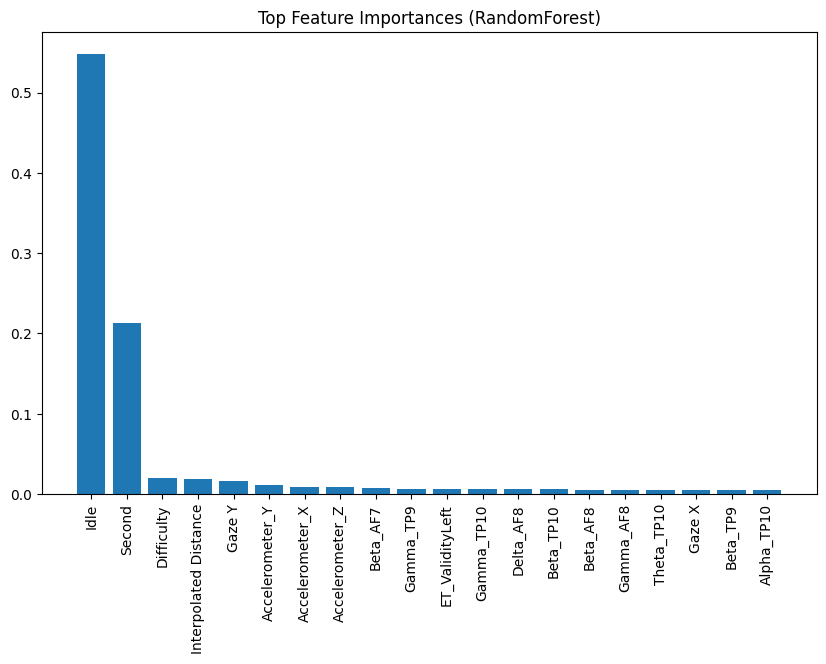

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

In [ ]:
df.head()

,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,fix_count,fix_mean_dur,fix_dur_var,fix_disp_mean,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_amp_mean,sac_vel_mean,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_ValidityLeft,ET_ValidityRight,ResponseTime,Difficulty,Idle,Student,QuestionKey
0,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.948536,0.733450,0.626364,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,96.0,311.619409,31334.796170,0.175403,136402.478510,66467.086301,25.0,53.745926,6.564607,202.073094,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,0.074380,0.000000,7.654472,0.0,0,1,1Item1
1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.856370,0.700926,0.111918,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,116.0,306.353083,12692.712854,0.142642,249.337145,1857.949767,4.0,12.586613,0.290974,32.149300,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,0.000000,0.066667,7.654472,0.0,0,1,1Item1
2,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,0.754324,0.786090,-0.249427,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,107.0,346.124971,15268.526548,0.196410,18768.997145,24199.116250,13.0,42.955415,4.124228,132.086826,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,0.000000,0.016667,7.654472,0.0,0,1,1Item1
3,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,0.895805,1.149560,-0.153594,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,104.0,601.330480,138999.949372,0.147897,76207.197913,27947.237737,13.0,36.540588,4.120809,202.940889,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,0.016667,0.025000,7.654472,0.0,0,1,1Item1
4,4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.899771,1.012238,-0.003289,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,107.0,660.522381,106887.221253,0.198848,67911.015554,22148.236533,13.0,54.293946,9.983783,305.476766,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.230763,100.132843,0.001514,0.018418,1278.021008,429.546218,576.959493,29.834330,11.945481,0.033333,0.025000,7.654472,0.0,0,1,1Item1


In [ ]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student"])
y = df["ResponseTime"]
groups = df["Student"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model_2 = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model_2.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
rf_2_y_pred = rf_model_2.predict(X_test)

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, rf_2_y_pred))
print("R2 Score: ", r2_score(y_test, rf_2_y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rf_2_y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, rf_2_y_pred)))

Mean Squared Error:  50.98527763891885
R2 Score:  0.862674388145514
Mean Absolute Error:  3.7702636783890147
Root Mean Squared Error:  7.140397582692357


In [ ]:
rf_model_2_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(rf_model_2_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.48764347 0.5544734  0.4775992  0.53607413 0.57282426]
Mean R²: 0.5257228888033502


In [ ]:
importances = rf_model_2.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

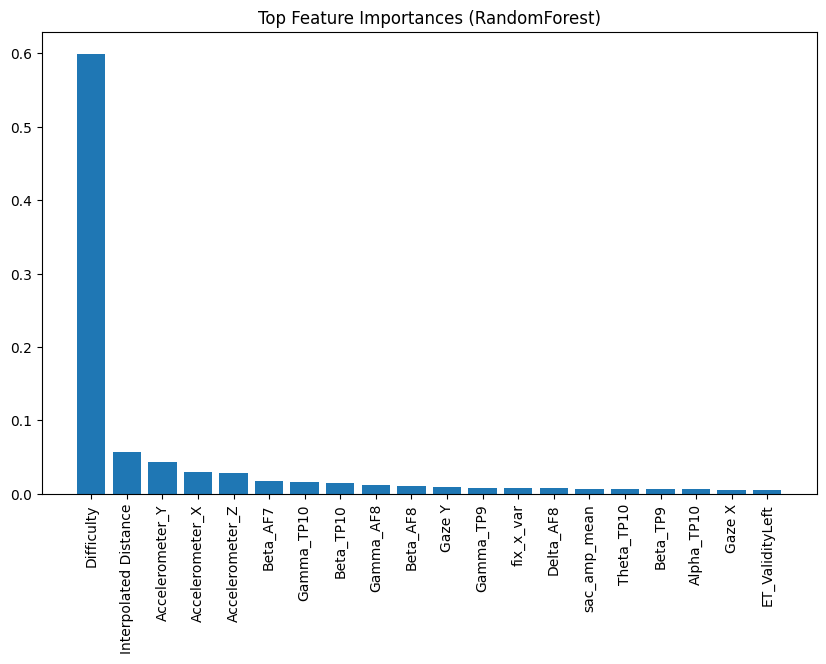

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

In [ ]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df["ResponseTime"]
groups = df["Student"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model_3 = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model_3.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
rf_3_y_pred = rf_model_3.predict(X_test)

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, rf_3_y_pred))
print("R2 Score: ", r2_score(y_test, rf_3_y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rf_3_y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, rf_3_y_pred)))

Mean Squared Error:  147.27790502793462
R2 Score:  0.6033163031131652
Mean Absolute Error:  7.951573596312237
Root Mean Squared Error:  12.13581085168744


In [ ]:
rf_model_3_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(rf_model_3_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.03169464 0.15775697 0.28425528 0.27556352 0.15126601]
Mean R²: 0.1801072844263968


In [ ]:
importances = rf_model_3.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:40]  # top 20

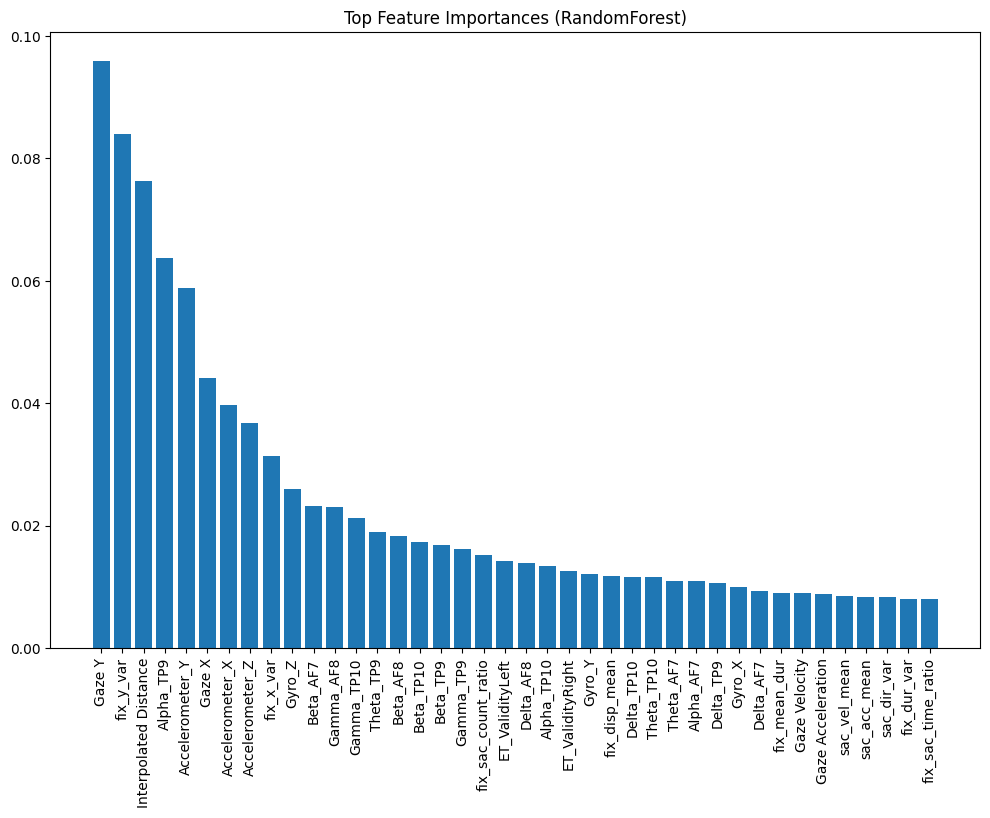

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

In [ ]:
def detect_bad_students(df, min_var=1e-3, zero_threshold=0.95):
    bad_students = []
    for sid, group in df.groupby("Student"):
        features = group.drop(columns=["ResponseTime","Student","QuestionKey","Idle","Second","Difficulty"])
        feature_vars = features.var()
        zero_ratio = (features == 0).mean()

        # More relaxed: if *most* features are low variance or zero-heavy
        low_var_fraction = (feature_vars < min_var).mean()
        zero_fraction = (zero_ratio > zero_threshold).mean()

        if (low_var_fraction > 0.5) or (zero_fraction > 0.5):
            bad_students.append(sid)

    return bad_students


In [ ]:
bad_students =  detect_bad_students(df, zero_threshold=0.40)

In [ ]:
bad_students

[10, 21, 31]

In [ ]:
df_clean = df[~df["Student"].isin(bad_students)].copy()

In [ ]:
df_clean.shape

(44924, 59)

In [ ]:
X = df_clean.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df_clean["ResponseTime"]
groups = df_clean["Student"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model_4 = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model_4.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
rf_4_y_pred = rf_model_4.predict(X_test)

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, rf_4_y_pred))
print("R2 Score: ", r2_score(y_test, rf_4_y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rf_4_y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, rf_4_y_pred)))

Mean Squared Error:  157.7869407606129
R2 Score:  0.594980204330652
Mean Absolute Error:  7.990873484198356
Root Mean Squared Error:  12.561327189457844


In [ ]:
rf_model_4_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
scores = cross_val_score(rf_model_4_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [ ]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.24301105 0.11040289 0.23079295 0.22397898 0.29341192]
Mean R²: 0.22031955896124628


In [ ]:
importances = rf_model_3.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:40]  # top 20

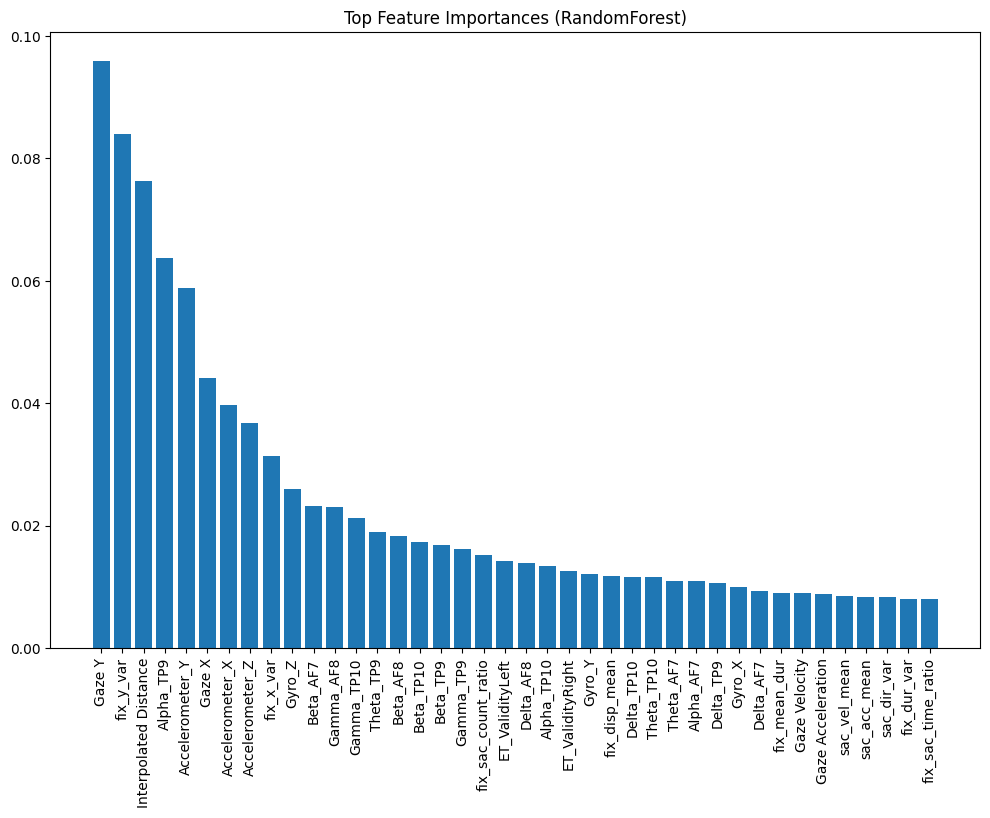

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X = df_clean.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df_clean["ResponseTime"]
groups = df_clean["Student"]

In [ ]:
xgb_model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="gpu_hist",   # GPU enabled
        predictor="gpu_predictor",
        random_state=42
    )

In [ ]:
xgb_model.fit(X_train,y_train)

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:54:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:54:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
xgb_y_pred = xgb_model.predict(X_test)

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [13:54:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [13:54:36] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This w

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, xgb_y_pred))
print("R2 Score: ", r2_score(y_test, xgb_y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, xgb_y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, xgb_y_pred)))

Mean Squared Error:  136.58170639624404
R2 Score:  0.6494114497048014
Mean Absolute Error:  7.647269008198416
Root Mean Squared Error:  11.686817633395503


In [ ]:
xgb_model_cv  = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="gpu_hist",   # GPU enabled
        predictor="gpu_predictor",
        random_state=42
    )

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
xgb_scores = cross_val_score(xgb_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:54:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:54:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [13:54:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `dev

In [ ]:
print("R² per fold:", xgb_scores)
print("Mean R²:", np.mean(xgb_scores))

R² per fold: [0.1685664  0.20608206 0.25687202 0.232703   0.26982854]
Mean R²: 0.22681040589239157


In [ ]:
importances = xgb_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

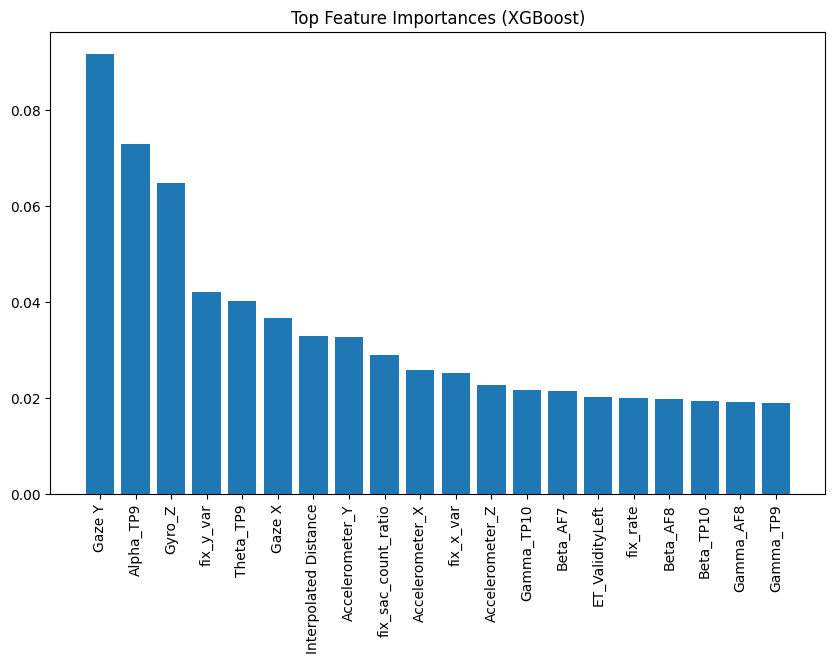

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (XGBoost)")
plt.show()

In [ ]:
# Apply normalization per student
features = X.columns
df_clean[features] = df_clean.groupby("Student")[features].transform(
    lambda x: (x - x.mean()) / x.std()
)

In [ ]:
# Replace NaNs (from constant features) with 0
df_clean[features] = df_clean[features].fillna(0)

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
X = df_clean.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df_clean["ResponseTime"]
groups = df_clean["Student"]

In [ ]:
lgb_model =  LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        device="gpu",     # GPU enabled
        random_state=42
    )

In [ ]:
lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 12565
[LightGBM] [Info] Number of data points in the train set: 35939, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 47 dense feature groups (1.65 MB) transferred to GPU in 0.001987 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 13.460368


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [ ]:
lgb_y_pred = lgb_model.predict(X_test)

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, lgb_y_pred))
print("R2 Score: ", r2_score(y_test, lgb_y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, lgb_y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, lgb_y_pred)))

Mean Squared Error:  129.37116584909828
R2 Score:  0.6679200261750255
Mean Absolute Error:  7.44801866642507
Root Mean Squared Error:  11.374144620546122


In [ ]:
lgb_model_cv =  LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        device="gpu",     # GPU enabled
        random_state=42
    )

In [ ]:
cv = GroupKFold(n_splits=5)

In [ ]:
lgb_scores = cross_val_score(lgb_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 13113
[LightGBM] [Info] Number of data points in the train set: 35970, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 53 dense feature groups (1.92 MB) transferred to GPU in 0.002380 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 13.857949
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 13115
[LightGBM] [Info] Number of data points in the train set: 35936, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5070, Vendor: NVIDIA Corporatio

In [ ]:
print("R² per fold:", lgb_scores)
print("Mean R²:", np.mean(lgb_scores))

R² per fold: [0.29762757 0.22147204 0.27116592 0.20529169 0.15775675]
Mean R²: 0.23066279334050796


In [ ]:
importances = lgb_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:40]  # top 20

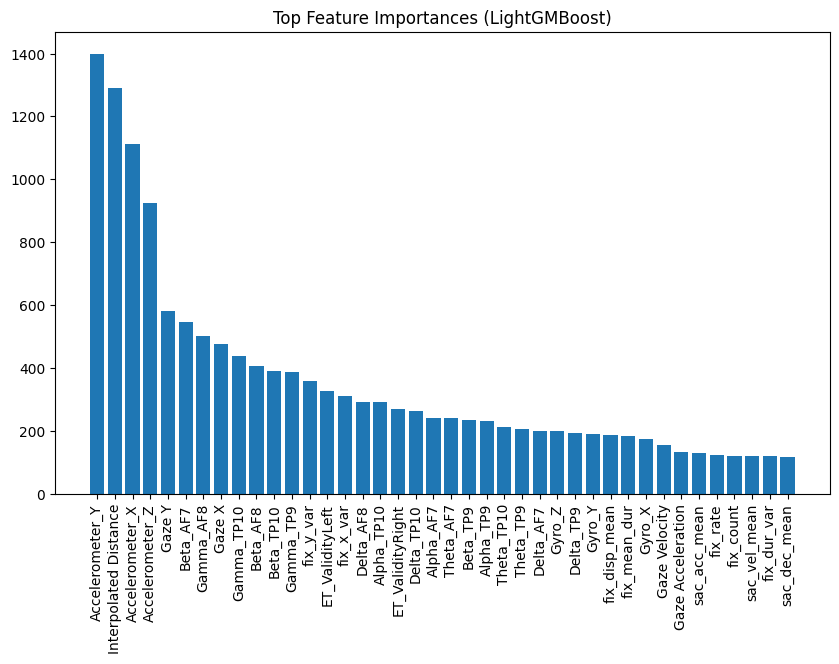

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (LightGMBoost)")
plt.show()

In [ ]:
import tensorflow as tf

I0000 00:00:1760171092.428519    7344 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1760171092.621858    7344 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1760171093.446850    7344 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [ ]:
# --- Prepare data ---
X = df_clean.drop(columns=["ResponseTime","Student","QuestionKey","Idle","Second","Difficulty"]).values
y = df_clean["ResponseTime"].values
groups = df_clean["Student"].values

In [ ]:
# --- Define MLP model ---
def create_mlp(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation="relu", input_shape=(input_dim,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1)   # regression output
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="mse")
    return model

In [ ]:
# --- GroupKFold Cross-Validation ---
cv = GroupKFold(n_splits=5)
r2_scores = []

In [ ]:
for train_idx, val_idx in cv.split(X, y, groups):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_mlp(X.shape[1])
    # add early stopping
    es = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50, batch_size=32,
              verbose=0, callbacks=[es])

    y_pred = model.predict(X_val, verbose=0).squeeze()
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1760171093.847481    7344 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1760171093.850932    7344 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1760171093.856746    7344 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9136 MB

In [ ]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.3302112188392332, 0.23836312114300595, 0.22837276074089352, 0.24680592639997312, 0.3142437720327894]
Mean R²: 0.27159935983117905


In [ ]:
# --- Prepare data (already normalized per-student) ---
X = df_clean.drop(columns=["ResponseTime","Student","QuestionKey","Idle","Second","Difficulty"]).values
y = df_clean["ResponseTime"].values
groups = df_clean["Student"].values

In [ ]:
# --- Define stronger MLP ---
def create_stronger_mlp(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, input_shape=(input_dim,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(128),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(64),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(1)   # regression output
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="mse")
    return model

In [ ]:
# --- Cross-validation ---
cv = GroupKFold(n_splits=5)
r2_scores = []

In [ ]:
for train_idx, val_idx in cv.split(X, y, groups):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_stronger_mlp(X.shape[1])

    # Callbacks: Early stopping + LR scheduler
    es = tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)
    lr_sched = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-5)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100, batch_size=32,
              verbose=0, callbacks=[es, lr_sched])

    y_pred = model.predict(X_val, verbose=0).squeeze()
    r2_scores.append(r2_score(y_val, y_pred))

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_d

In [ ]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.3304734362972398, 0.26146876712651435, 0.23452411794390093, 0.2695163252136755, 0.33116596347622174]
Mean R²: 0.28542972201151046


In [ ]:
df_clean = df[~df["Student"].isin(bad_students)].copy()

In [ ]:
from tensorflow.keras import layers, models, regularizers, callbacks

def build_next_mlp(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        # Wider + BatchNorm + Dropout
        layers.Dense(512, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Hidden layers
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),

        # Output layer for regression
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='mse',
        metrics=['mae']
    )
    return model


In [ ]:
X = df_clean.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"]).values
y = df_clean['ResponseTime'].values
groups = df_clean['Student'].values

In [ ]:
kf = GroupKFold(n_splits=5)
r2_scores = []

In [ ]:
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y, groups)):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = build_next_mlp(X.shape[1])

    # callbacks
    es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    lr = callbacks.ReduceLROnPlateau(patience=5, factor=0.5)

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=64,
        verbose=0,
        callbacks=[es, lr]
    )

    # evaluate R²
    y_pred = model.predict(X_val).ravel()
    ss_res = np.sum((y_val - y_pred) ** 2)
    ss_tot = np.sum((y_val - np.mean(y_val)) ** 2)
    r2 = 1 - ss_res/ss_tot
    r2_scores.append(r2)
    print(f"Fold {fold+1} R²: {r2:.4f}")

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 1 R²: 0.2765
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 2 R²: 0.2450
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 3 R²: 0.2532


I0000 00:00:1760172415.872095   89423 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_38', 16 bytes spill stores, 16 bytes spill loads



282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 4 R²: 0.2982
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 5 R²: 0.2456


In [ ]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [np.float64(0.2765028925594365), np.float64(0.24498167388781034), np.float64(0.25315178456074094), np.float64(0.2982383851898719), np.float64(0.24561990645157172)]
Mean R²: 0.26369892852988625


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

In [ ]:
# PARAMETERS
SEQ_LEN = 10            # sequence length in seconds (tune: 5, 10, 20)
FEATURE_EXCLUDE = ['QuestionKey','Second','Student','ResponseTime','Difficulty','Idle']  # exclude non-feature cols
PAD_VALUE = 0.0

In [ ]:
def build_sequences_from_second_df(df, seq_len=SEQ_LEN, features_to_exclude=FEATURE_EXCLUDE):
    # keep only trials with real ResponseTime (ignore 'None' trials where ResponseTime is NaN/-1)
    df = df.copy()
    # treat ResponseTime = NaN or <=0 as missing, adjust if you used -1 sentinel
    df = df[~df['ResponseTime'].isna()]   # only trials with target
    # If you used -1, do: df = df[df['ResponseTime'] != -1]

    # numeric features
    feat_cols = [c for c in df.columns if c not in features_to_exclude and df[c].dtype != 'O']
    print("feature columns:", feat_cols)

    X_list = []
    y_list = []
    groups = []  # student id per example

    # group by student+question to build a trial sequence
    for (sid, qk), g in df.groupby(['Student', 'QuestionKey']):
        # g should be ordered by Second
        g = g.sort_values('Second')
        seq = g[feat_cols].values  # shape (T, F)
        # choose last seq_len seconds (or first)
        if seq.shape[0] >= seq_len:
            window = seq[-seq_len:, :]
        else:
            # pad on the left with PAD_VALUE
            pad = np.full((seq_len - seq.shape[0], seq.shape[1]), PAD_VALUE, dtype=np.float32)
            window = np.vstack([pad, seq])
        X_list.append(window)
        # target is the trial ResponseTime (single scalar)
        y_list.append(g['ResponseTime'].iloc[0])
        groups.append(sid)

    X = np.stack(X_list)    # shape (N_examples, seq_len, n_features)
    y = np.array(y_list).astype(np.float32)
    groups = np.array(groups).astype(int)

    return X, y, groups, feat_cols

In [ ]:
# Example:
# final_df is your combined dataset
X, y, groups, feat_cols = build_sequences_from_second_df(df_clean, seq_len=SEQ_LEN)
print("X shape", X.shape, "y shape", y.shape)

feature columns: ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9', 'Theta_AF7', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF8', 'Gamma_TP10', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'HSI_TP9_flag', 'HSI_TP10_flag', 'HSI_AF7_flag', 'HSI_AF8_flag', 'fix_count', 'fix_mean_dur', 'fix_dur_var', 'fix_disp_mean', 'fix_x_var', 'fix_y_var', 'sac_count', 'sac_mean_dur', 'sac_amp_mean', 'sac_vel_mean', 'sac_acc_mean', 'sac_dec_mean', 'sac_dir_var', 'fix_valid', 'sac_valid', 'fix_sac_count_ratio', 'fix_sac_time_ratio', 'fix_rate', 'sac_rate', 'Gaze X', 'Gaze Y', 'Interpolated Distance', 'Gaze Velocity', 'Gaze Acceleration', 'ET_ValidityLeft', 'ET_ValidityRight']
X shape (1330, 10, 53) y shape (1330,)


In [ ]:
def build_temporal_cnn(input_shape, l2_reg=1e-4):
    # input_shape = (seq_len, n_features)
    inp = layers.Input(shape=input_shape)
    x = inp

    # 1D conv blocks
    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(pool_size=2)(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv1D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(pool_size=2)(x)
    x = layers.Dropout(0.2)(x)

    # global features
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    out = layers.Dense(1)(x)

    model = models.Model(inp, out)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
    return model

In [ ]:
def build_bilstm(input_shape, units=128):
    inp = layers.Input(shape=input_shape)
    x = layers.Bidirectional(layers.LSTM(units, return_sequences=True))(inp)
    x = layers.Dropout(0.3)(x)
    x = layers.Bidirectional(layers.LSTM(units//2, return_sequences=False))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    out = layers.Dense(1)(x)

    model = models.Model(inp, out)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
    return model

In [ ]:
def train_and_eval_model(X, y, groups, model_builder, n_splits=5, epochs=100, batch_size=64):
    kf = GroupKFold(n_splits=n_splits)
    r2s = []
    fold = 0
    for train_idx, val_idx in kf.split(X, y, groups):
        fold += 1
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Flatten features for scaler: combine time and sample dims
        n_examples, seq_len, n_feat = X_train.shape
        scaler = StandardScaler()
        X_train_flat = X_train.reshape(-1, n_feat)
        scaler.fit(X_train_flat)
        # apply transform and reshape back
        X_train = scaler.transform(X_train_flat).reshape(n_examples, seq_len, n_feat)
        X_val = scaler.transform(X_val.reshape(-1, n_feat)).reshape(X_val.shape)

        model = model_builder((seq_len, n_feat))

        es = callbacks.EarlyStopping(patience=12, restore_best_weights=True)
        rl = callbacks.ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6)

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[es, rl],
            verbose=1
        )

        y_pred = model.predict(X_val).ravel()
        fold_r2 = r2_score(y_val, y_pred)
        print(f"Fold {fold} R2: {fold_r2:.4f}")
        r2s.append(fold_r2)
    print("R² per fold:", r2s)
    print("Mean R²:", np.mean(r2s))
    return r2s

In [ ]:
# Example: run Temporal CNN
r2s_tcnn = train_and_eval_model(X, y, groups, lambda shp: build_temporal_cnn(shp), n_splits=5, epochs=80, batch_size=64)

Epoch 1/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 264.3027 - mae: 10.7710 - val_loss: 299.9764 - val_mae: 12.3066 - learning_rate: 0.0010
Epoch 2/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 117.4482 - mae: 7.1881 - val_loss: 299.4637 - val_mae: 12.0978 - learning_rate: 0.0010
Epoch 3/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.1546 - mae: 6.2552 - val_loss: 322.9033 - val_mae: 13.0250 - learning_rate: 0.0010
Epoch 4/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.7153 - mae: 5.8723 - val_loss: 310.1642 - val_mae: 12.8045 - learning_rate: 0.0010
Epoch 5/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.7496 - mae: 5.3207 - val_loss: 323.4279 - val_mae: 13.2008 - learning_rate: 0.0010
Epoch 6/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.7664 - mae: 4.7746 - val_loss: 311.6633 - val_mae: 13.2001 - learning_rate: 0.0010
Epoch 7/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.0689 - mae: 4.5567 - val_loss: 298.3430 - val_mae: 12.8609 - learning_

In [ ]:
# Example: run BiLSTM
r2s_bilstm = train_and_eval_model(X, y, groups, lambda shp: build_bilstm(shp, units=128), n_splits=5, epochs=80, batch_size=64)

Epoch 1/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 387.8227 - mae: 14.7879 - val_loss: 334.8252 - val_mae: 13.9692 - learning_rate: 0.0010
Epoch 2/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 204.0276 - mae: 9.0915 - val_loss: 242.2393 - val_mae: 11.1200 - learning_rate: 0.0010
Epoch 3/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 129.0163 - mae: 7.2847 - val_loss: 191.9571 - val_mae: 9.3749 - learning_rate: 0.0010
Epoch 4/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 118.0076 - mae: 6.9934 - val_loss: 176.9789 - val_mae: 8.9096 - learning_rate: 0.0010
Epoch 5/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 106.7011 - mae: 6.4404 - val_loss: 174.3294 - val_mae: 8.8808 - learning_rate: 0.0010
Epoch 6/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 104.3963 - mae: 6.3617 - val_loss: 154.7209 - val_mae: 8.1525 - learning_rate: 0.0010
Epoch 7/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 96.1101 - mae: 6.2049 - val_loss: 156.9390 - val_mae: 8.2167 - learning_r